This notebook is a trial run based on IBMs Qiskit example on creating the first bell state. An API call is made to run this circuit on actual hardware.

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import EstimatorV2 as Estimator

# Bell States:

$$
1.\; |\Phi^+ \rangle = \frac{|00 \rangle + |11 \rangle}{\sqrt{2}}
$$
$$
2.\; |\Phi^- \rangle = \frac{|00 \rangle - |11 \rangle}{\sqrt{2}}
$$
$$
3.\; |\Psi^+ \rangle = \frac{|01 \rangle + |10 \rangle}{\sqrt{2}}
$$
$$
4.\; |\Psi^- \rangle = \frac{|01 \rangle - |10 \rangle}{\sqrt{2}}
$$

In [2]:
#setting up registers and circuits
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

#First bell state:
circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.measure(qreg_q, creg_c)

print(circuit)

NameError: name 'QuantumRegister' is not defined

In [ ]:
#setting up registers and circuits
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit_state_two = QuantumCircuit(qreg_q, creg_c)

#Second bell state (tmp)

#First bell state bit with an initial pauli x gate
circuit_state_two.x(qreg_q[0])
circuit_state_two.h(qreg_q[0])
circuit_state_two.cx(qreg_q[0], qreg_q[1])
circuit_state_two.measure(qreg_q, creg_c)

print(circuit_state_two)

     ┌───┐┌───┐     ┌─┐   
q_0: ┤ X ├┤ H ├──■──┤M├───
     └───┘└───┘┌─┴─┐└╥┘┌─┐
q_1: ──────────┤ X ├─╫─┤M├
               └───┘ ║ └╥┘
c: 2/════════════════╩══╩═
                     0  1 


In [ ]:
#setting up registers and circuits
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit_state_three = QuantumCircuit(qreg_q, creg_c)

#Third bell state (tmp)

# Add two Pauli Z gates
circuit_state_three.x(qreg_q[0])
circuit_state_three.h(qreg_q[0])
circuit_state_three.cx(qreg_q[0], qreg_q[1])

circuit_state_three.measure(qreg_q, creg_c)

print(circuit_state_three)

In [ ]:
#setting up registers and circuits
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit_state_four = QuantumCircuit(qreg_q, creg_c)

#Fourth bell state (tmp)

# Add two Pauli Z gates
circuit_state_four.x(qreg_q[1])
circuit_state_four.h(qreg_q[0])
circuit_state_four.z(qreg_q[0])
circuit_state_four.z(qreg_q[1])
circuit_state_four.cx(qreg_q[0], qreg_q[1])

circuit_state_four.measure(qreg_q, creg_c)

print(circuit_state_four)

In [ ]:
# Setting up six observables.
 
observables_labels = ["IZ", "IX", "ZI", "XI", "ZZ", "XX"]
observables = [SparsePauliOp(label) for label in observables_labels]

qiskit_runtime_service._resolve_cloud_instances:WARNING:2025-08-30 22:45:20,159: Default instance not set. Searching all available instances.


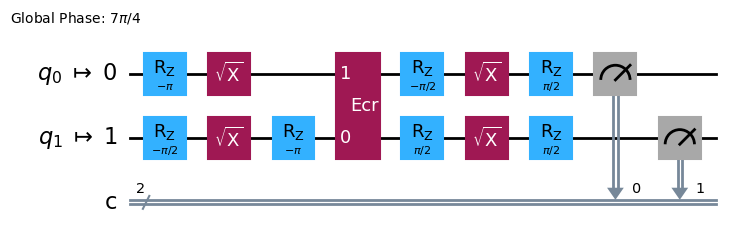

In [ ]:
service = QiskitRuntimeService()

backend = service.least_busy(simulator=False, operational=True)

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(circuit)

isa_circuit.draw("mpl", idle_wires=False)

In [ ]:
# Construct Estimator instance

estimator = Estimator(mode=backend)
estimator.options.resilience_level = 1
estimator.options.default_shots = 1000

mapped_observables = [observable.apply_layout(isa_circuit.layout) for observable in observables]

job = estimator.run([(isa_circuit, mapped_observables)])
 
# Use the job ID to retrieve your job data later
print(f">>> Job ID: {job.job_id()}")

>>> Job ID: d2pm5qtpoa4c73c9020g


In [ ]:
job_result = job.result()

pub_result = job.result()[0]

KeyboardInterrupt: 

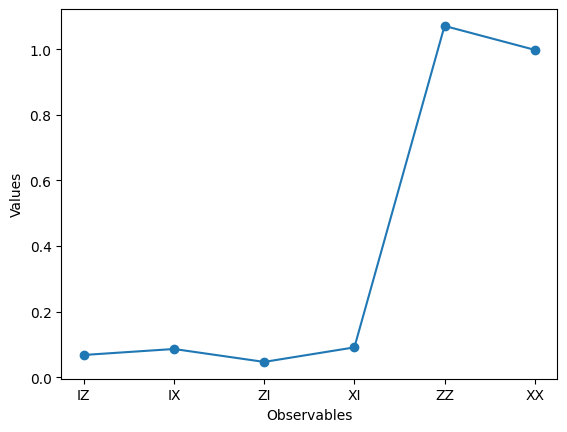

In [ ]:
#Plotting the results
from matplotlib import pyplot as plt

values = pub_result.data.evs

errors = pub_result.data.stds

plt.plot(observables_labels, values, "-o")
plt.xlabel("Observables")
plt.ylabel("Values")
plt.show()